In [95]:
import os
import geopandas as gpd
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import descartes
import numpy as np
import pandas as pd
from shapely.geometry import Point, Polygon

%matplotlib inline

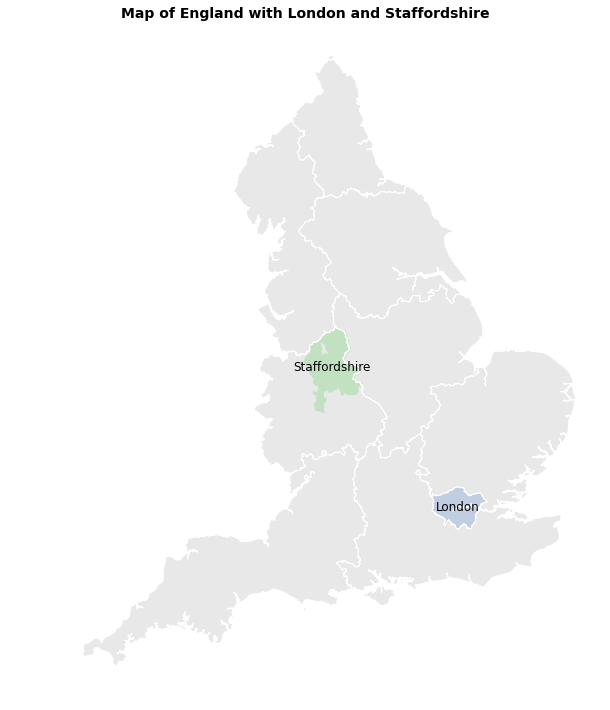

In [220]:
# Load the shapefiles
london_shapefile = gpd.read_file('London-wards-2018_ESRI/London_Ward.shp')
staffordshire_shapefile = gpd.read_file('Boundary2023-08-12-07-00/Boundaries_Polygon.shp')

# Load the UK shapefile and exclude codes for Scotland, Wales, and Northern Ireland
uk_shapefile = gpd.read_file('NUTS1_Jan_2018_SGCB_in_the_UK_2022_-1211818472919078414/NUTS1_Jan_2018_SGCB_in_the_UK.shp')
england_shapefile = uk_shapefile.query("nuts118cd not in ['UKL', 'UKM', 'UKN']")

# Create a subplot for the map of England
fig, ax = plt.subplots(figsize=(10, 10))
england_shapefile.boundary.plot(ax=ax, color='white', linewidth=1)  # White outline

# Light grey fill color for the shape of England
england_shapefile.plot(ax=ax, facecolor='#e8e8e8', edgecolor='white', linewidth=0.5)  # Light grey color

# Plot London map within England
london_shapefile.plot(ax=ax, facecolor='#c1cee1', edgecolor='#c1cee1', linewidth=0.5)
london_centroid = london_shapefile.unary_union.centroid
ax.annotate('London', (london_centroid.x, london_centroid.y), color='black', fontsize=12, ha='center', va='center')

# Plot Staffordshire map within England
staffordshire_shapefile.plot(ax=ax, facecolor='#c1e1c1', edgecolor='#c1e1c1', linewidth=0.5)
staffordshire_centroid = staffordshire_shapefile.unary_union.centroid
ax.annotate('Staffordshire', (staffordshire_centroid.x, staffordshire_centroid.y), color='black', fontsize=12, ha='center', va='center')

ax.set_title('Map of England with London and Staffordshire', fontsize=14, fontweight='bold')
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()

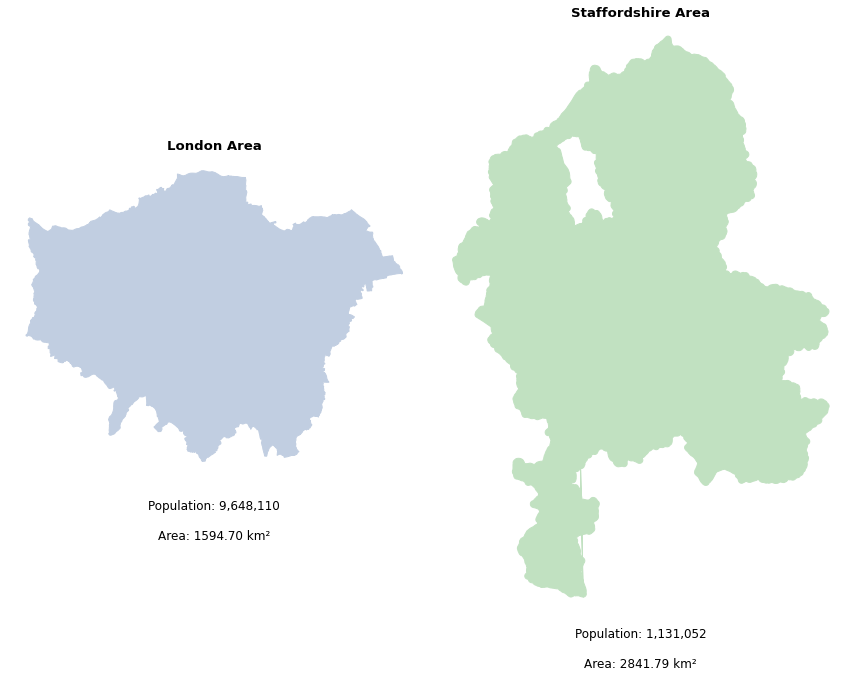

In [212]:
# Load the shapefiles
london_shapefile = gpd.read_file('London-wards-2018_ESRI/London_Ward.shp')
staffordshire_shapefile = gpd.read_file('Boundary2023-08-12-07-00/Boundaries_Polygon.shp')

# Calculate population and area for each location
london_population = 9648110
staffordshire_population = 1131052

london_area = london_shapefile['geometry'].unary_union.area / 10**6  # Convert to km^2
staffordshire_area = staffordshire_shapefile['geometry'].unary_union.area / 10**6  # Convert to km^2

# Calculate the scaling factor for Staffordshire's map
scale_factor = staffordshire_area / london_area

# Create subplots with adjusted figure size
fig, axs = plt.subplots(1, 2, figsize=(12, 6 * scale_factor))

# Plot London map
london_shapefile.plot(ax=axs[0], facecolor='#c1cee1', edgecolor='#c1cee1')
axs[0].set_title('London Area', fontweight='bold')
axs[0].set_aspect('equal')
axs[0].axis('off')
axs[0].annotate(f'Population: {london_population:,}\n\nArea: {london_area:.2f} km²', xy=(0.5, -0.2), xycoords='axes fraction', ha='center', fontsize=12)

# Plot Staffordshire map
staffordshire_shapefile.plot(ax=axs[1], facecolor='#c1e1c1', edgecolor='#c1e1c1')
axs[1].set_title('Staffordshire Area', fontweight='bold', y=0.975)  # Adjusted y parameter
axs[1].set_aspect('equal')
axs[1].axis('off')
axs[1].annotate(f'Population: {staffordshire_population:,}\n\nArea: {staffordshire_area:.2f} km²', xy=(0.5, -0.07), xycoords='axes fraction', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [221]:
# Load the crime datasets
london_crime_data = pd.read_csv('2022-11-city-of-london-street.csv')
staffordshire_crime_data = pd.read_csv('2022-11-staffordshire-street.csv')

# Drop the 'Context' column from the dataframes
london_crime_data = london_crime_data.drop(columns='Context')
staffordshire_crime_data = staffordshire_crime_data.drop(columns='Context')

# Display 5 random rows from London crime data
print("London Crime Data (2022-11):")
display(london_crime_data.sample(5))

# Display 5 random rows from Staffordshire crime data
print("\nStaffordshire Crime Data (2022-11):")
display(staffordshire_crime_data.sample(5))


London Crime Data (2022-11):


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
282,de703abefab9e0fd45edd5b7649a9ecd81fb36e708e8c2...,2022-11,City of London Police,City of London Police,-0.091947,51.513188,On or near Pancras Lane,E01032739,City of London 001F,Other theft,Investigation complete; no suspect identified
147,NaN,2022-11,City of London Police,City of London Police,-0.080291,51.514814,On or near Bury Court,E01032739,City of London 001F,Anti-social behaviour,NaN
509,406fee528433461775dd5a6d6a36170cc41ecae676ea72...,2022-11,City of London Police,City of London Police,-0.092633,51.509872,On or near Bell Wharf Lane,E01032739,City of London 001F,Vehicle crime,Investigation complete; no suspect identified
309,0d0e95acdae65fd0c47c5af3afb2147f1dd0d2d61a5393...,2022-11,City of London Police,City of London Police,-0.093339,51.511557,On or near,E01032739,City of London 001F,Other theft,Investigation complete; no suspect identified
735,46f33bfd53ed5f49f5fff36cca3799baa432336db0e4f7...,2022-11,City of London Police,City of London Police,NaN,NaN,No Location,NaN,NaN,Theft from the person,Investigation complete; no suspect identified



Staffordshire Crime Data (2022-11):


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
7756,3505da2c4f800eb411ea09296cedd1fd40035afa20b77a...,2022-11,Staffordshire Police,Staffordshire Police,-2.129497,52.992998,On or near Heber Street,E01014300,Stoke-on-Trent 022C,Public order,Further action is not in the public interest
1979,4aa338df876301d8f0a9783baf865ff14fe9c0e7a2b75c...,2022-11,Staffordshire Police,Staffordshire Police,-1.938546,52.678765,On or near,E01029497,Lichfield 006E,Vehicle crime,Investigation complete; no suspect identified
7728,1b3cc8f3b44ad6ef31ded4cbb9da56de97fa5dd9b58af1...,2022-11,Staffordshire Police,Staffordshire Police,-2.134623,52.993568,On or near Flackett Street,E01014298,Stoke-on-Trent 022B,Burglary,Investigation complete; no suspect identified
5919,NaN,2022-11,Staffordshire Police,Staffordshire Police,-2.143177,53.052724,On or near Wallis Way,E01014265,Stoke-on-Trent 007D,Anti-social behaviour,NaN
1702,c7264e3fa0329e2b68eef299d265981b285acf1edb7cd3...,2022-11,Staffordshire Police,Staffordshire Police,-1.924947,52.690785,On or near Common View,E01029486,Lichfield 003A,Public order,Unable to prosecute suspect


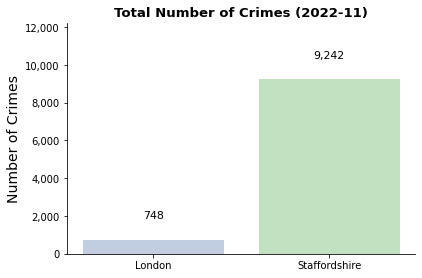

In [211]:
# Tally the total number of crimes for each set
london_total_crimes = london_crime_data.shape[0]
staffordshire_total_crimes = staffordshire_crime_data.shape[0]

# Create a bar chart
locations = ['London', 'Staffordshire']
totals = [london_total_crimes, staffordshire_total_crimes]

colors = ['#c1cee1', '#c1e1c1']  # Pale green with slight green hue

plt.bar(locations, totals, color=colors)
plt.title('Total Number of Crimes (2022-11)', fontweight='bold')  # Bold title
plt.ylabel('Number of Crimes')

# Add tallied numbers above each bar
for i, total in enumerate(totals):
    formatted_total = "{:,}".format(total)  # Format with commas
    plt.text(i, total + 1000, formatted_total, ha='center', va='bottom')

# Format y-axis numbers with commas
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Adjust ylim to increase space between top of chart and highest bar
plt.ylim(0, max(totals) + 3000)

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [142]:
# Get unique crime types from both datasets
london_unique_crimes = london_crime_data['Crime type'].unique()
staffordshire_unique_crimes = staffordshire_crime_data['Crime type'].unique()

# Combine crime types from both datasets
all_crimes = set(london_unique_crimes) | set(staffordshire_unique_crimes)

# Convert the combined set to a sorted list
sorted_crimes = sorted(list(all_crimes))

# Print the list of crime types with bullet points
print("\033[1mCrime Types:\033[0m")
for crime_type in sorted_crimes:
    print("•", crime_type)

Crime Types:
• Anti-social behaviour
• Bicycle theft
• Burglary
• Criminal damage and arson
• Drugs
• Other crime
• Other theft
• Possession of weapons
• Public order
• Robbery
• Shoplifting
• Theft from the person
• Vehicle crime
• Violence and sexual offences


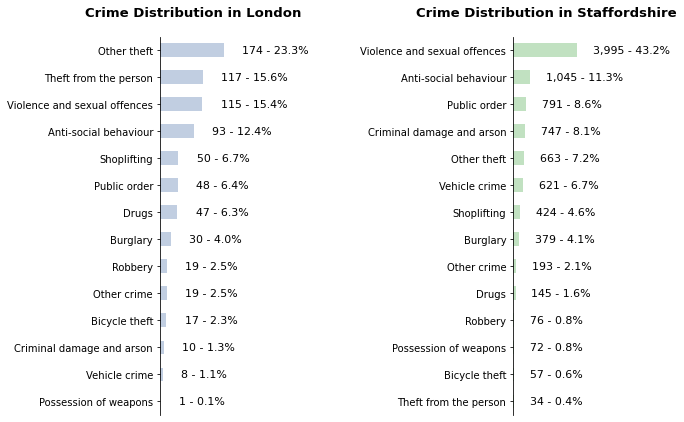

In [209]:
# Group by crime type and count occurrences
london_crime_counts = london_crime_data['Crime type'].value_counts()
staffordshire_crime_counts = staffordshire_crime_data['Crime type'].value_counts()

# Set custom font sizes
plt.rcParams['font.size'] = 11  # Adjust font size here
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Create larger figure
plt.figure(figsize=(10, 6))

# Plot horizontal bar graph for London
plt.subplot(1, 2, 1)
london_crime_counts_sorted = london_crime_counts.sort_values()
london_crime_counts_sorted.plot(kind='barh', color='#c1cee1')
plt.title('Crime Distribution in London', pad=20, fontweight='bold')
plt.xlabel('Number of Crimes')
plt.gca().axes.get_xaxis().set_visible(False)  # Remove x-axis

# Add total number and percentage at the end of each bar
for index, value in enumerate(london_crime_counts_sorted):
    plt.text(value + 50, index, f'{value:,} - {value / london_crime_counts.sum() * 100:.1f}%', va='center')

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)  # Remove bottom border

# Plot horizontal bar graph for Staffordshire
plt.subplot(1, 2, 2)
staffordshire_crime_counts_sorted = staffordshire_crime_counts.sort_values()
staffordshire_crime_counts_sorted.plot(kind='barh', color='#c1e1c1')
plt.title('Crime Distribution in Staffordshire', pad=20, fontweight='bold')
plt.xlabel('Number of Crimes')
plt.gca().axes.get_xaxis().set_visible(False)  # Remove x-axis

# Add total number and percentage at the end of each bar
for index, value in enumerate(staffordshire_crime_counts_sorted):
    plt.text(value + 1000, index, f'{value:,} - {value / staffordshire_crime_counts.sum() * 100:.1f}%', va='center')

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)  # Remove bottom border

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.tight_layout()
plt.show()


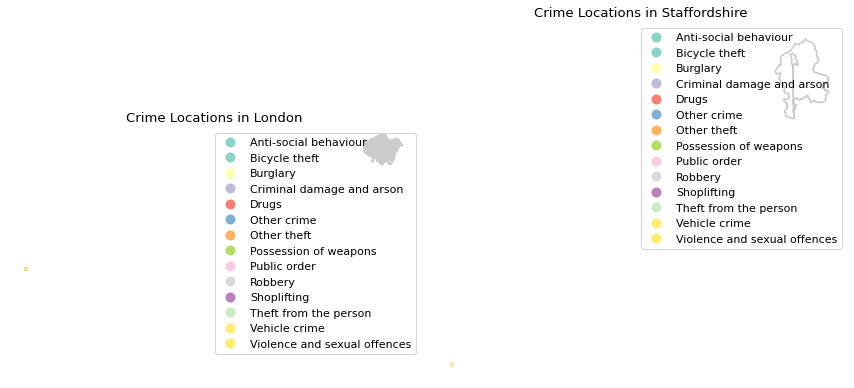

In [144]:
# Create GeoDataFrames from crime datasets
london_crime_gdf = gpd.GeoDataFrame(london_crime_data,
                                    geometry=[Point(xy) for xy in zip(london_crime_data['Longitude'], london_crime_data['Latitude'])])

staffordshire_crime_gdf = gpd.GeoDataFrame(staffordshire_crime_data,
                                            geometry=[Point(xy) for xy in zip(staffordshire_crime_data['Longitude'], staffordshire_crime_data['Latitude'])])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot London map with crime locations
london_shapefile.boundary.plot(ax=axs[0], color='black')
london_crime_gdf.plot(ax=axs[0], markersize=5, column='Crime type', legend=True, cmap='Set3')
axs[0].set_title('Crime Locations in London')
axs[0].axis('off')

# Plot Staffordshire map with crime locations
staffordshire_shapefile.boundary.plot(ax=axs[1], color='black')
staffordshire_crime_gdf.plot(ax=axs[1], markersize=5, column='Crime type', legend=True, cmap='Set3')
axs[1].set_title('Crime Locations in Staffordshire')
axs[1].axis('off')

plt.tight_layout()
plt.show()


In [151]:
# Get unique outcome types from both datasets
london_unique_outcomes = london_crime_data['Last outcome category'].unique()
staffordshire_unique_outcomes = staffordshire_crime_data['Last outcome category'].unique()

# Convert the values to strings before creating sets
london_unique_outcomes = [str(outcome) for outcome in london_unique_outcomes]
staffordshire_unique_outcomes = [str(outcome) for outcome in staffordshire_unique_outcomes]

# Combine outcome types from both datasets
all_outcomes = set(london_unique_outcomes) | set(staffordshire_unique_outcomes)

# Convert the combined set to a sorted list
sorted_outcomes = sorted(list(all_outcomes))

# Remove NaN values
sorted_outcomes = [outcome for outcome in sorted_outcomes if pd.notnull(outcome)]

# Print the list of outcome types with bullet points and bold title
print("\033[1mOutcome Types:\033[0m")
for outcome_type in sorted_outcomes:
    print("•", outcome_type)


Outcome Types:
• Action to be taken by another organisation
• Awaiting court outcome
• Formal action is not in the public interest
• Further action is not in the public interest
• Further investigation is not in the public interest
• Investigation complete; no suspect identified
• Local resolution
• Offender given a caution
• Offender given a drugs possession warning
• Offender given penalty notice
• Status update unavailable
• Suspect charged as part of another case
• Unable to prosecute suspect
• nan


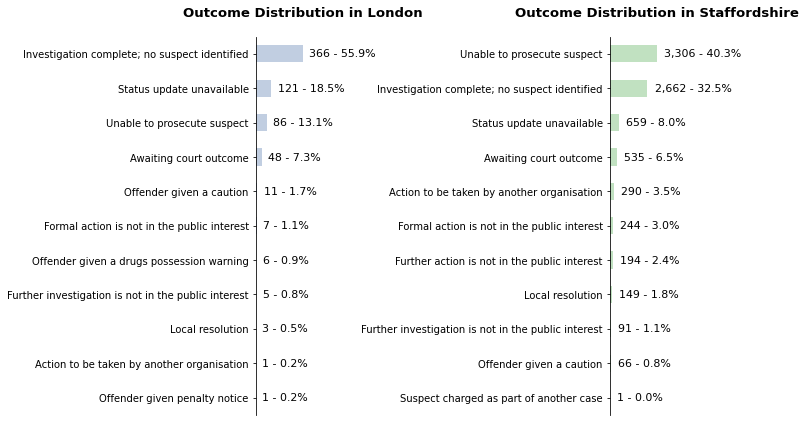

In [210]:
# Group by outcome type and count occurrences
london_outcome_counts = london_crime_data['Last outcome category'].value_counts()
staffordshire_outcome_counts = staffordshire_crime_data['Last outcome category'].value_counts()

# Set custom font sizes
plt.rcParams['font.size'] = 11  # Adjust font size here
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Create larger figure
plt.figure(figsize=(10, 6))

# Plot horizontal bar graph for London outcomes
plt.subplot(1, 2, 1)
london_outcome_counts_sorted = london_outcome_counts.sort_values()
london_outcome_counts_sorted.plot(kind='barh', color='#c1cee1')
plt.title('Outcome Distribution in London', pad=20, fontweight='bold')
plt.xlabel('Number of Outcomes')
plt.gca().axes.get_xaxis().set_visible(False)  # Remove x-axis

# Set x-axis limit
plt.xlim(0, max(london_outcome_counts_sorted) * 2)  # Adjust the multiplier as needed

# Add total number and percentage at the end of each bar
for index, value in enumerate(london_outcome_counts_sorted):
    plt.text(value + 50, index, f'{value:,} - {value / london_outcome_counts.sum() * 100:.1f}%', va='center')

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)  # Remove bottom border

# Plot horizontal bar graph for Staffordshire outcomes
plt.subplot(1, 2, 2)
staffordshire_outcome_counts_sorted = staffordshire_outcome_counts.sort_values()
staffordshire_outcome_counts_sorted.plot(kind='barh', color='#c1e1c1')
plt.title('Outcome Distribution in Staffordshire', pad=20, fontweight='bold')
plt.xlabel('Number of Outcomes')
plt.gca().axes.get_xaxis().set_visible(False)  # Remove x-axis

# Set x-axis limit
plt.xlim(0, max(staffordshire_outcome_counts_sorted) * 2)  # Adjust the multiplier as needed

# Add total number and percentage at the end of each bar
for index, value in enumerate(staffordshire_outcome_counts_sorted):
    plt.text(value + 500, index, f'{value:,} - {value / staffordshire_outcome_counts.sum() * 100:.1f}%', va='center')

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)  # Remove bottom border

# Adjust spacing between subplots
plt.subplots_adjust(wspace=1)

plt.tight_layout()
plt.show()